In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import os
import torch 
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_curve, auc


In [18]:
PATH = "/home/andres/Dropbox/PhD Smart Environments - RUG/Experiments/GNNs/gnn_ensemble/out/"
DSNAME = "UCIHAR"
ACTIVITY = 1
# DS_VARIANT = f"ensemble_interpolate_bm_{ACTIVITY}"
DS_VARIANT = f"contrastive"
MODEL = "graphconv"
postfix = "20240218_045628"

# checkpoint = torch.load(f"../models/Checkpoints/{DSNAME}_{MODEL}_best_training_{D_VARIANT}_{M_VARIANT}.pth")

### Load training curves

In [19]:
training_acc_loss = pickle.load(open(f"{PATH}{DSNAME}/training/acc_losses_{DS_VARIANT}_{MODEL}_{postfix}.pkl", 'rb'))
train_acc_arr = training_acc_loss["train_acc"]
train_loss_arr = training_acc_loss["train_loss"]
val_acc_arr = training_acc_loss["val_acc"]
val_loss_arr = training_acc_loss["val_loss"]

### Plot training and validation accuracies and losses

In [20]:
EPOCHS = len(train_loss_arr)

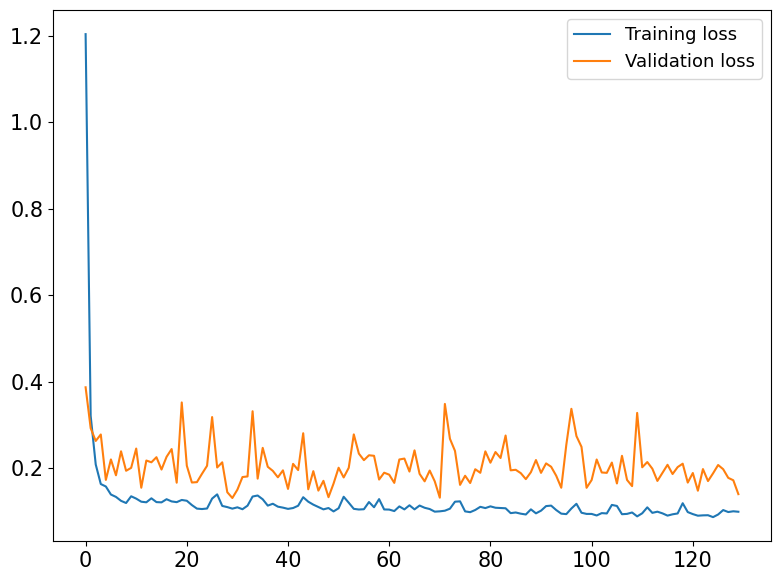

In [21]:
# plt.figure(figsize=(8,6))
# plt.plot(np.arange(EPOCHS), np.array(train_acc_arr[0:EPOCHS]), label='Training accuracy')
# plt.plot(np.arange(EPOCHS), np.array(val_acc_arr[0:EPOCHS]), label='Validation accuracy')
# plt.legend()

# plt.tight_layout()
# plt.savefig(f'{PATH + DSNAME}/figs/train_acc_{DS_VARIANT}_{MODEL}_{postfix}.svg', format="svg"),
# plt.show()

plt.figure(figsize=(8,6))

plt.plot(np.arange(EPOCHS), np.array(train_loss_arr[0:EPOCHS]), label='Training loss')
plt.plot(np.arange(EPOCHS), np.array(val_loss_arr[0:EPOCHS]), label='Validation loss')
plt.legend()
plt.tight_layout()
# plt.savefig(f'{PATH + DSNAME}/figs/train_loss_{DS_VARIANT}_{MODEL}_{postfix}.svg', format="svg"),
plt.show()


### Load results

In [22]:
if "ensemble" in DS_VARIANT:
#     results = pickle.load(open(f"{PATH}{DSNAME}/ensembles/training/results_val_{DS_VARIANT}_{MODEL}_{postfix}.pkl", 'rb'))
    results = pickle.load(open(f"{PATH}{DSNAME}/ensembles/testing/results_{DS_VARIANT}_{MODEL}_{postfix}.pkl", 'rb'))
else:
    results = pickle.load(open(f"{PATH}{DSNAME}/training/results_{DS_VARIANT}_{MODEL}_{postfix}.pkl", 'rb'))
y_test = np.asarray(results["y_test"])
y_pred = np.asarray(results["y_pred"])

In [23]:
print(f"accuracy: {100*results['accuracy']:.2f}")
# print(f"balanced accuracy: {100*results['balanced_accuracy']:.2f}")
print(f"f_score: {100*results['f1_score']:.2f}")

accuracy: 91.43
f_score: 91.82


In [24]:
if DSNAME == "UCIHAR":
    all_labels = ["Walking", "Walking Up", "Walking Down", "Sitting", "Standing", "Laying"]
elif DSNAME == "PAMAP2":    
    all_labels = ['Lying down', 'Sitting', 'Standing', 'Walking', 'Running', 'Cycling', 'Nordic Walk', 'Walking Upstairs', 'Walking Downstairs', 'Vacuum Cleaning', 'Ironing', 'Rope Jumping']
if DSNAME == "MHEALTH":
    all_labels = ['Standing', 'Sitting', 'Lying down', 'Walking', 'Climbing stairs', 'Waist bends forward', 'Arms up', 'Knees Bending', 'Cycling', 'Jogging', 'Running', 'Jumping']
if DSNAME == "REALDISP":
    all_labels = ['Walking', 'Jogging', 'Running', 'Jumping', 'Jump rope', 'Waist bends forward', 'Arms up', 'Knees to breast', 'Knees Bending', 'Cycling']
# if "ensemble" in DS_VARIANT:
#     labels_dict={k:v for k,v in enumerate(all_labels)}
#     labels = ['Other', labels_dict[ACTIVITY]]
# else:
#     labels = all_labels

labels = all_labels

In [25]:
cm = confusion_matrix(y_test, y_pred, normalize="all")
cm = np.round(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis],4)

In [26]:
cm[np.diag_indices_from(cm)], np.mean(cm[np.diag_indices_from(cm)])

(array([0.8946, 0.9858, 0.9722, 0.9009, 0.7649, 1.    ]), 0.9197333333333333)

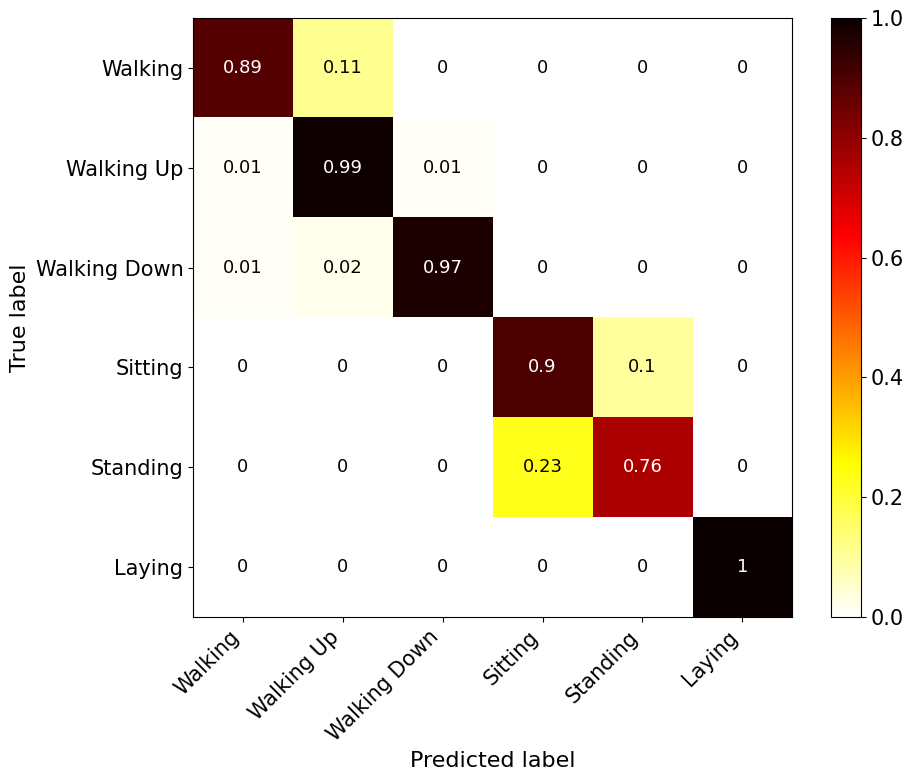

In [27]:
cm = confusion_matrix(y_test, y_pred, normalize="all")
cm = np.round(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis],2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,  
                              display_labels=labels, )
fig, ax = plt.subplots(figsize=(10,8))
disp.plot(ax=ax, cmap=plt.cm.hot_r)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.rcParams.update({'font.size': 13})
plt.rc('axes', labelsize=16)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=15)    # fontsize of the tick labels
plt.tight_layout()
plt.savefig(f'../out/{DSNAME}/figs/cfmtrx_{DS_VARIANT}_final_{MODEL}_{postfix}.svg', format="svg", bbox_inches="tight"),
plt.savefig(f'../out/{DSNAME}/figs/cfmtrx_{DS_VARIANT}_final_{MODEL}_{postfix}.pdf', format="pdf", bbox_inches="tight"),
plt.show()